# German Credit - full utility evaluation

In [1]:
import sklearn
import pandas as pd
import os
import json
from matplotlib import pyplot as plt
import seaborn as sns
import os
import random

In [2]:
import warnings
warnings. filterwarnings('ignore')

In [3]:
os.chdir('C:/Users/tsarcevic/PycharmProjects/fingerprinting-toolbox')
from datasets import GermanCredit, Dataset
from scheme import Universal

In [40]:
sns.set_theme()

## Statistics of original data
### Numerical

In [5]:
original_data = GermanCredit()

In [6]:
original_data.dataframe.mean()

Id                   499.500
duration              20.903
credit_amount       3271.258
installment_rate       2.973
residence_since        2.845
age                   35.546
existing_credits       1.407
liable_people          1.155
target                 1.300
dtype: float64

In [7]:
original_data.dataframe.std()

Id                   288.819436
duration              12.058814
credit_amount       2822.736876
installment_rate       1.118715
residence_since        1.103718
age                   11.375469
existing_credits       0.577654
liable_people          0.362086
target                 0.458487
dtype: float64

### Categorical

In [43]:
original_data.categorical_attributes

Index(['checking_account', 'credit_hist', 'purpose', 'savings',
       'employment_since', 'sex_status', 'debtors', 'property',
       'installment_other', 'housing', 'job', 'tel', 'foreign'],
      dtype='object')

<Axes: xlabel='credit_hist', ylabel='count'>

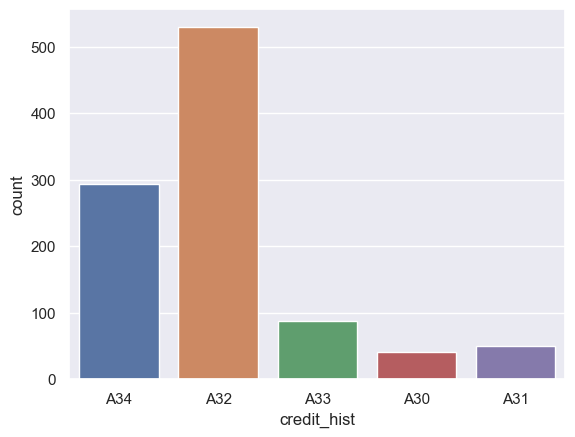

In [41]:
sns.countplot(x='credit_hist', data= original_data.dataframe)

## Statistics of fingerprinted data

In [9]:
mean_dataframe = pd.DataFrame()
std_dataframe = pd.DataFrame()
var_dataframe = pd.DataFrame()
all_fp_datasets = os.listdir('evaluation/fingerprinted_data/german_credit')
for fp_dataset_path in all_fp_datasets:
    fp_dataset = Dataset(path='evaluation/fingerprinted_data/german_credit/' + fp_dataset_path,
                                  target_attribute='target', primary_key_attribute='Id')
    a, b, fp_len, gamma, xi, secret_key, r = fp_dataset_path.split('_')
    fp_len = int(fp_len[1:]); gamma = float(gamma[1:]); xi = int(xi[1:]); secret_key = int(secret_key)
    if fp_len!=32: continue
    
    mean = fp_dataset.dataframe.mean()
    std = fp_dataset.dataframe.std()
    var = fp_dataset.dataframe.var()
    mean['gamma'] = var['gamma'] = std['gamma'] = gamma
    mean['xi'] = var['xi'] = std['xi'] = xi

    mean_dataframe = mean_dataframe.append(mean, ignore_index=True)
    std_dataframe = std_dataframe.append(std, ignore_index=True)
    var_dataframe = var_dataframe.append(var, ignore_index=True)

### Difference in mean (num)

In [10]:
mean_dataframe = mean_dataframe.pivot(columns=['gamma', 'xi']).stack(level=0).reset_index(level=1).groupby(['level_1']).max()

In [11]:
mean_dataframe

gamma                1.00                          1.11                       \
xi                     1.0       2.0       4.0       1.0       2.0       4.0   
level_1                                                                        
Id                 499.500   499.500   499.500   499.500   499.500   499.500   
age                 35.542    35.536    35.541    35.542    35.536    35.552   
credit_amount     3271.266  3271.266  3271.295  3271.263  3271.260  3271.287   
duration            20.920    20.922    20.913    20.918    20.919    20.909   
existing_credits     1.402     1.410     1.454     1.404     1.411     1.454   
installment_rate     2.978     2.979     3.003     2.974     2.973     2.991   
liable_people        1.140     1.169     1.234     1.141     1.168     1.227   
residence_since      2.856     2.863     2.940     2.853     2.860     2.935   
target               1.300     1.300     1.300     1.300     1.300     1.300   

gamma                1.25                          1.43   ...     2.50   \
xi                     1.0       2.0       4.0       1.0  ...       4.0   
level_1                                                   ...             
Id                 499.500   499.500   499.500   499.500  ...   499.500   
age                 35.542    35.538    35.550    35.543  ...    35.565   
credit_amount     3271.263  3271.259  3271.282  3271.263  ...  3271.265   
duration            20.915    20.916    20.912    20.912  ...    20.898   
existing_credits     1.402     1.409     1.444     1.401  ...     1.416   
installment_rate     2.975     2.975     2.997     2.977  ...     2.988   
liable_people        1.144     1.167     1.212     1.147  ...     1.189   
residence_since      2.850     2.855     2.925     2.853  ...     2.875   
target               1.300     1.300     1.300     1.300  ...     1.300   

gamma                3.33                          5.00                       \
xi                     1.0       2.0       4.0       1.0       2.0       4.0   
level_1                                                                        
Id                 499.500   499.500   499.500   499.500   499.500   499.500   
age                 35.548    35.542    35.561    35.544    35.544    35.541   
credit_amount     3271.264  3271.268  3271.275  3271.256  3271.256  3271.253   
duration            20.905    20.903    20.909    20.907    20.912    20.893   
existing_credits     1.404     1.405     1.412     1.408     1.409     1.425   
installment_rate     2.976     2.977     2.976     2.971     2.973     2.993   
liable_people        1.151     1.160     1.184     1.157     1.155     1.166   
residence_since      2.847     2.849     2.862     2.846     2.842     2.873   
target               1.300     1.300     1.300     1.300     1.300     1.300   

gamma                10.00                      
xi                     1.0       2.0       4.0  
level_1                                         
Id                 499.500   499.500   499.500  
age                 35.546    35.545    35.547  
credit_amount     3271.261  3271.261  3271.259  
duration            20.903    20.900    20.894  
existing_credits     1.405     1.407     1.412  
installment_rate     2.974     2.974     2.973  
liable_people        1.154     1.154     1.159  
residence_since      2.844     2.845     2.845  
target               1.300     1.300     1.300  

[9 rows x 30 columns]

In [12]:
mean_diff = mean_dataframe.copy()

In [13]:
for idx in mean_diff.index:
    mean_diff.loc[idx] = mean_diff.loc[idx].apply(lambda val: val-original_data.dataframe.mean()[idx])

In [14]:
mean_diff

gamma             1.00                 1.11                 1.25          \
xi                  1.0    2.0    4.0    1.0    2.0    4.0    1.0    2.0   
level_1                                                                    
Id                0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000   
age              -0.004 -0.010 -0.005 -0.004 -0.010  0.006 -0.004 -0.008   
credit_amount     0.008  0.008  0.037  0.005  0.002  0.029  0.005  0.001   
duration          0.017  0.019  0.010  0.015  0.016  0.006  0.012  0.013   
existing_credits -0.005  0.003  0.047 -0.003  0.004  0.047 -0.005  0.002   
installment_rate  0.005  0.006  0.030  0.001  0.000  0.018  0.002  0.002   
liable_people    -0.015  0.014  0.079 -0.014  0.013  0.072 -0.011  0.012   
residence_since   0.011  0.018  0.095  0.008  0.015  0.090  0.005  0.010   
target            0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000   

gamma                    1.43   ...  2.50   3.33                 5.00          \
xi                  4.0    1.0  ...    4.0    1.0    2.0    4.0    1.0    2.0   
level_1                         ...                                             
Id                0.000  0.000  ...  0.000  0.000  0.000  0.000  0.000  0.000   
age               0.004 -0.003  ...  0.019  0.002 -0.004  0.015 -0.002 -0.002   
credit_amount     0.024  0.005  ...  0.007  0.006  0.010  0.017 -0.002 -0.002   
duration          0.009  0.009  ... -0.005  0.002  0.000  0.006  0.004  0.009   
existing_credits  0.037 -0.006  ...  0.009 -0.003 -0.002  0.005  0.001  0.002   
installment_rate  0.024  0.004  ...  0.015  0.003  0.004  0.003 -0.002  0.000   
liable_people     0.057 -0.008  ...  0.034 -0.004  0.005  0.029  0.002  0.000   
residence_since   0.080  0.008  ...  0.030  0.002  0.004  0.017  0.001 -0.003   
target            0.000  0.000  ...  0.000  0.000  0.000  0.000  0.000  0.000   

gamma                    10.00                
xi                  4.0    1.0    2.0    4.0  
level_1                                       
Id                0.000  0.000  0.000  0.000  
age              -0.005  0.000 -0.001  0.001  
credit_amount    -0.005  0.003  0.003  0.001  
duration         -0.010  0.000 -0.003 -0.009  
existing_credits  0.018 -0.002  0.000  0.005  
installment_rate  0.020  0.001  0.001  0.000  
liable_people     0.011 -0.001 -0.001  0.004  
residence_since   0.028 -0.001  0.000  0.000  
target            0.000  0.000  0.000  0.000  

[9 rows x 30 columns]

In [15]:
mean_diff.to_latex()

'\\begin{tabular}{lrrrrrrrrrrrrrrrrrrrrrrrrrrrrrr}\n\\toprule\ngamma & \\multicolumn{3}{l}{1.0} & \\multicolumn{3}{l}{1.11} & \\multicolumn{3}{l}{1.25} & \\multicolumn{3}{l}{1.43} & \\multicolumn{3}{l}{1.67} & \\multicolumn{3}{l}{2.0} & \\multicolumn{3}{l}{2.5} & \\multicolumn{3}{l}{3.33} & \\multicolumn{3}{l}{5.0} & \\multicolumn{3}{l}{10.0} \\\\\nxi &    1.0 &    2.0 &    4.0 &    1.0 &    2.0 &    4.0 &    1.0 &    2.0 &    4.0 &    1.0 &    2.0 &    4.0 &    1.0 &    2.0 &    4.0 &    1.0 &    2.0 &    4.0 &    1.0 &    2.0 &    4.0 &    1.0 &    2.0 &    4.0 &    1.0 &    2.0 &    4.0 &    1.0 &    2.0 &    4.0 \\\\\nlevel\\_1          &        &        &        &        &        &        &        &        &        &        &        &        &        &        &        &        &        &        &        &        &        &        &        &        &        &        &        &        &        &        \\\\\n\\midrule\nId               &  0.000 &  0.000 &  0.000 &  0.000 &  0.000 & 

### Difference in std (num)

In [16]:
std_dataframe = std_dataframe.pivot(columns=['gamma', 'xi']).stack(level=0).reset_index(level=1).groupby(['level_1']).max()

In [17]:
std_dataframe

gamma                   1.00                                   1.11   \
xi                        1.0          2.0          4.0          1.0   
level_1                                                                
Id                 288.819436   288.819436   288.819436   288.819436   
age                 11.386390    11.385356    11.430353    11.384808   
credit_amount     2822.747454  2822.754655  2822.720051  2822.739923   
duration            12.071343    12.079480    12.157188    12.074397   
existing_credits     0.625129     0.611780     0.802825     0.619005   
installment_rate     1.146661     1.159268     1.279307     1.141327   
liable_people        0.413002     0.438898     0.819705     0.411447   
residence_since      1.128955     1.146973     1.420006     1.128124   
target               0.458487     0.458487     0.458487     0.458487   

gamma                                             1.25                \
xi                        2.0          4.0          1.0          2.0   
level_1                                                                
Id                 288.819436   288.819436   288.819436   288.819436   
age                 11.383773    11.413920    11.384808    11.383327   
credit_amount     2822.739815  2822.724855  2822.740390  2822.743640   
duration            12.083561    12.161769    12.076159    12.085653   
existing_credits     0.606999     0.800328     0.615447     0.605050   
installment_rate     1.149605     1.241959     1.139154     1.146163   
liable_people        0.433548     0.781077     0.406730     0.428129   
residence_since      1.146174     1.417316     1.123727     1.137220   
target               0.458487     0.458487     0.458487     0.458487   

gamma                                1.43   ...        2.50         3.33   \
xi                        4.0          1.0  ...          4.0          1.0   
level_1                                     ...                             
Id                 288.819436   288.819436  ...   288.819436   288.819436   
age                 11.415771    11.384540  ...    11.394543    11.379507   
credit_amount     2822.731265  2822.740390  ...  2822.736611  2822.738484   
duration            12.158457    12.072780  ...    12.106534    12.065386   
existing_credits     0.751950     0.613658  ...     0.633518     0.592567   
installment_rate     1.235523     1.136557  ...     1.169283     1.129912   
liable_people        0.720816     0.391848  ...     0.606339     0.379925   
residence_since      1.385386     1.119216  ...     1.222649     1.104904   
target               0.458487     0.458487  ...     0.458487     0.458487   

gamma                                             5.00                \
xi                        2.0          4.0          1.0          2.0   
level_1                                                                
Id                 288.819436   288.819436   288.819436   288.819436   
age                 11.373812    11.394038    11.372660    11.372660   
credit_amount     2822.739502  2822.729187  2822.738294  2822.736584   
duration            12.068357    12.095827    12.060340    12.060253   
existing_credits     0.591037     0.616958     0.582989     0.586569   
installment_rate     1.134795     1.137857     1.126689     1.128514   
liable_people        0.385420     0.598751     0.380126     0.383565   
residence_since      1.103366     1.156847     1.105217     1.110076   
target               0.458487     0.458487     0.458487     0.458487   

gamma                                10.00                            
xi                        4.0          1.0          2.0          4.0  
level_1                                                               
Id                 288.819436   288.819436   288.819436   288.819436  
age                 11.372407    11.374413    11.373184    11.375728  
credit_amount     2822.732973  2822.734921  2822.734921  2822.735938  
duration            12.072667    12.059977    12.06198

In [18]:
std_diff = std_dataframe.copy()

In [19]:
for idx in std_diff.index:
    std_diff.loc[idx] = std_diff.loc[idx].apply(lambda val: val-original_data.dataframe.std()[idx])

In [20]:
std_diff

gamma                1.00                          1.11                       \
xi                     1.0       2.0       4.0       1.0       2.0       4.0   
level_1                                                                        
Id                0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
age               0.010922  0.009887  0.054885  0.009339  0.008305  0.038452   
credit_amount     0.010578  0.017779 -0.016825  0.003047  0.002939 -0.012021   
duration          0.012528  0.020665  0.098374  0.015583  0.024747  0.102955   
existing_credits  0.047475  0.034125  0.225171  0.041351  0.029344  0.222673   
installment_rate  0.027946  0.040554  0.160593  0.022612  0.030891  0.123244   
liable_people     0.050916  0.076812  0.457619  0.049361  0.071462  0.418991   
residence_since   0.025237  0.043255  0.316288  0.024406  0.042456  0.313598   
target            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

gamma                1.25                          1.43   ...     2.50   \
xi                     1.0       2.0       4.0       1.0  ...       4.0   
level_1                                                   ...             
Id                0.000000  0.000000  0.000000  0.000000  ...  0.000000   
age               0.009339  0.007859  0.040302  0.009072  ...  0.019074   
credit_amount     0.003514  0.006764 -0.005611  0.003514  ... -0.000265   
duration          0.017344  0.026838  0.099643  0.013965  ...  0.047719   
existing_credits  0.037792  0.027395  0.174296  0.036003  ...  0.055864   
installment_rate  0.020440  0.027448  0.116809  0.017843  ...  0.050569   
liable_people     0.044644  0.066043  0.358730  0.029762  ...  0.244253   
residence_since   0.020009  0.033502  0.281668  0.015498  ...  0.118931   
target            0.000000  0.000000  0.000000  0.000000  ...  0.000000   

gamma                3.33                          5.00                       \
xi                     1.0       2.0       4.0       1.0       2.0       4.0   
level_1                                                                        
Id                0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
age               0.004039 -0.001657  0.018569 -0.002808 -0.002808 -0.003061   
credit_amount     0.001608  0.002626 -0.007689  0.001418 -0.000292 -0.003903   
duration          0.006572  0.009542  0.037012  0.001526  0.001439  0.013853   
existing_credits  0.014912  0.013382  0.039303  0.005334  0.008914  0.108528   
installment_rate  0.011197  0.016080  0.019142  0.007974  0.009800  0.092243   
liable_people     0.017840  0.023334  0.236665  0.018040  0.021479  0.060552   
residence_since   0.001186 -0.000352  0.053129  0.001500  0.006358  0.083835   
target            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

gamma                10.00                      
xi                     1.0       2.0       4.0  
level_1                                         
Id                0.000000  0.000000  0.000000  
age              -0.001056 -0.002284  0.000260  
credit_amount    -0.001955 -0.001955 -0.000938  
duration          0.001162  0.003171  0.004613  
existing_credits  0.006568  0.005175  0.014466  
installment_rate -0.000424 -0.000424  0.042155  
liable_people     0.007266  0.001805  0.019837  
residence_since   0.002124  0.000000  0.003622  
target            0.000000  0.000000  0.000000  

[9 rows x 30 columns]

In [21]:
std_diff.to_latex()

'\\begin{tabular}{lrrrrrrrrrrrrrrrrrrrrrrrrrrrrrr}\n\\toprule\ngamma & \\multicolumn{3}{l}{1.0} & \\multicolumn{3}{l}{1.11} & \\multicolumn{3}{l}{1.25} & \\multicolumn{3}{l}{1.43} & \\multicolumn{3}{l}{1.67} & \\multicolumn{3}{l}{2.0} & \\multicolumn{3}{l}{2.5} & \\multicolumn{3}{l}{3.33} & \\multicolumn{3}{l}{5.0} & \\multicolumn{3}{l}{10.0} \\\\\nxi &       1.0 &       2.0 &       4.0 &       1.0 &       2.0 &       4.0 &       1.0 &       2.0 &       4.0 &       1.0 &       2.0 &       4.0 &       1.0 &       2.0 &       4.0 &       1.0 &       2.0 &       4.0 &       1.0 &       2.0 &       4.0 &       1.0 &       2.0 &       4.0 &       1.0 &       2.0 &       4.0 &       1.0 &       2.0 &       4.0 \\\\\nlevel\\_1          &           &           &           &           &           &           &           &           &           &           &           &           &           &           &           &           &           &           &           &           &           &        

### Difference in distribution (categorical)

In [45]:
original_data.dataframe['checking_account']

0      A11
1      A12
2      A14
3      A11
4      A11
      ... 
995    A14
996    A11
997    A14
998    A11
999    A12
Name: checking_account, Length: 1000, dtype: object

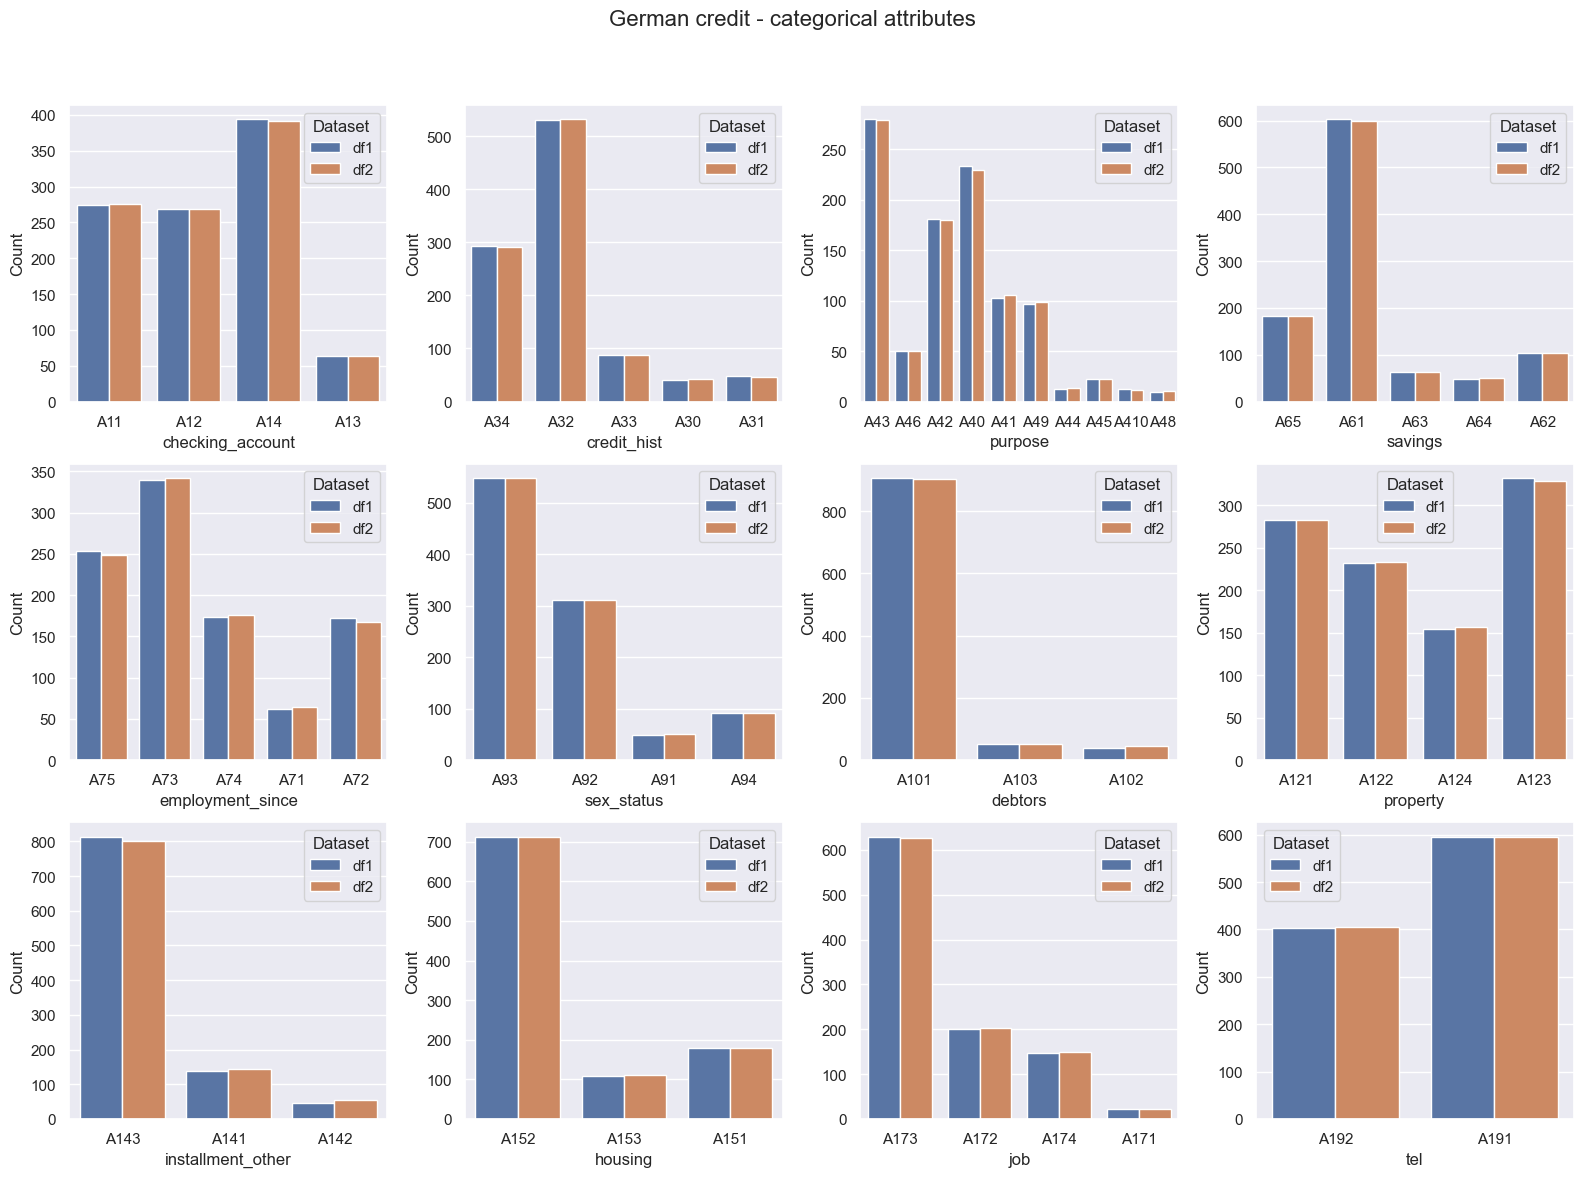

In [70]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
fig.suptitle('German credit - categorical attributes', fontsize=16)

axes = axes.flatten()

original_data.dataframe['dataset'] = ['original' for i in range(len(original_data.dataframe))]
fp_dataset.dataframe['dataset'] = ['fingerprinted' for i in range(len(fp_dataset.dataframe))]
for i, attribute in enumerate(original_data.categorical_attributes[:-1]): # plot 12 out of 13 because... 13
    ax = axes[i]
    sns.countplot(data=pd.concat([original_data.dataframe, 
                                  fp_dataset.dataframe], 
                                 ignore_index=True),
                  x=attribute, hue='dataset', ax=axes[i])
    #ax.set_title(f'Distribution of {attribute}')
    ax.legend(title='Dataset', labels=['df1', 'df2'])
    ax.set_xlabel(attribute)
    ax.set_ylabel('Count')
plt.tight_layout()
plt.subplots_adjust(top=0.9)

plt.savefig('evaluation/figures/utility_distributions_german_credit.svg')
plt.savefig('evaluation/figures/utility_distributions_german_credit.png')